# 5.10. Support Vector Machine

Dość popularnym algorytmem stosowanym w problemach klasyfikacji jest SVM. Jego główna idea opiera się na podziale zbioru hiperpłaszczyzną. Hiperpłaszczyzną nazywamy przestrzeń o wymiar niższą niż ta, w której zakodowane są nasze wektory cech. Jeśli więc mamy wektory o długości $ N $, to hiperpłaszczyzna będzie wyznaczona przez $ N $ parametrów oraz wyraz wolny. 

W dwóch wymiarach jesteśmy w stanie odseparować dwie grupy przykładów za pomocą prostej, o ile są one liniowo separowalne. W trzech wymiarach za pomocą płaszczyzny, a w wyższych wymiarach nazywamy ją hiperpłaszczyzną. Dla problemu liniowo separowalnego, istnieje nieskończenie wiele takich hiperpłaszczyzn. SVM dobiera taką, aby odseparować obiekty obu klsa z jak największym marginesem. Największy margines to taki, który jest po obu stronach możliwie najdalej od obiektów klas, jeśli rozważamy klasyfikację binarną.

Nie zawsze jednak dane są liniowo separowalne. W takim wypadku, SVM stara się dopasować hiperpłaszczyznę w taki sposób, aby liczba punktów pozostających po niepoprawnej stronie prostej, była jak najniższa. Nazwa *wektory wspierające* odnosi się do punktów danych, które są najbliżej stworzonej hiperpłaszczyzny i są punktami odniesienia.

## SVM w 2D

Przyjrzyjmy się temu jak działa SVM w przypadku dwuwymiarowym. Stwórzmy sobie do tego celu sztuczny zbiór danych. Wygenerujemy go losowo.

In [2]:
import pandas as pd
import numpy as np

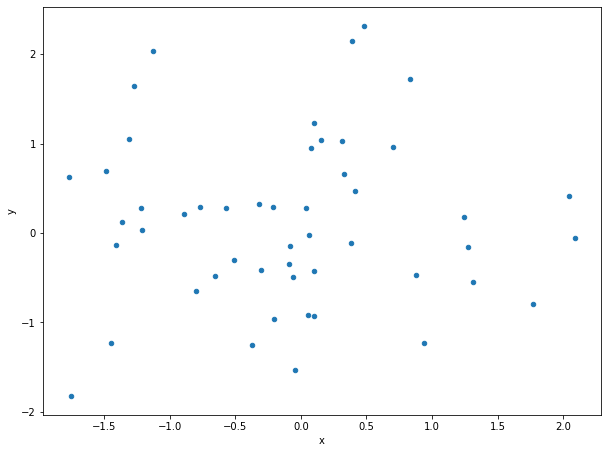

In [4]:
np.random.seed(2020)

one_df = pd.DataFrame({
    "x": np.random.normal(size=50),
    "y": np.random.normal(size=50),
})

one_df.plot.scatter(x="x", y="y", 
                    figsize=(10.0, 7.5))

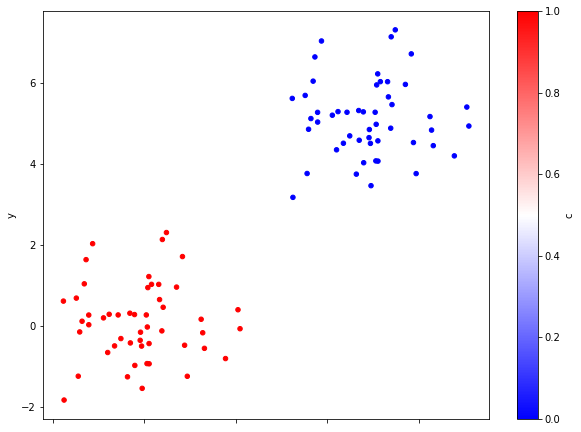

In [10]:
blobs_df = pd.concat([
    one_df.assign(c=1),
    (one_df + 5).assign(c=0),
])

blobs_df.plot.scatter(x="x", y="y", c="c",
                      cmap="bwr",
                      figsize=(10.0, 7.5))

Na pierwszy rzut oka widać, że stworzony problem jest liniowo separowalny. W związku z tym, SVM powinien poradzić sobie idealnie z klasyfikacją odpowiednich punktów. 

### Nauczanie modelu SVM

Skorzystamy oczywiście z gotowej implementacji, żeby stworzyć nasz klasyfikator bez większego wysiłku.

In [12]:
from sklearn.svm import LinearSVC

In [13]:
svm = LinearSVC()
svm.fit(blobs_df.drop(columns="c"), blobs_df["c"])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Zobaczmy, jak kształtują się granice decyzyjne stworzonego klasyfikatora.

In [28]:
x_test = np.linspace(-2, 8, 1000)
y_test = np.linspace(-2, 8, 1000)

In [29]:
import matplotlib.pyplot as plt

In [30]:
xx, yy = np.meshgrid(x_test, y_test)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]) \
    .reshape(xx.shape)

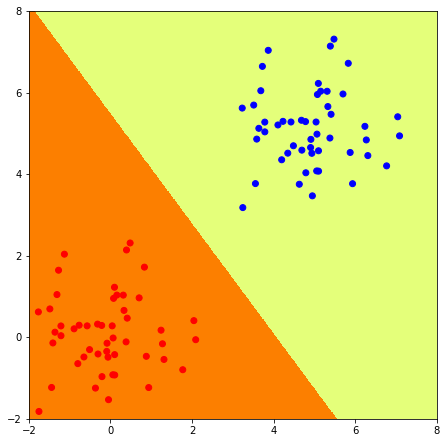

In [31]:
plt.figure(figsize=(10.5, 7.5))
plt.imshow(Z, interpolation="nearest",
           extent=(-2, 8, -2, 8),
           cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], 
            c=blobs_df["c"], cmap="bwr")

### Problem nieseparowalny liniowo

Powyższy problem był dość prosty i niezbyt realny. Stworzymy podobny zestaw danych, ale tym razem elementy nie będą leżały w aż tak oczywisty sposób tworzyć osobnych grup.

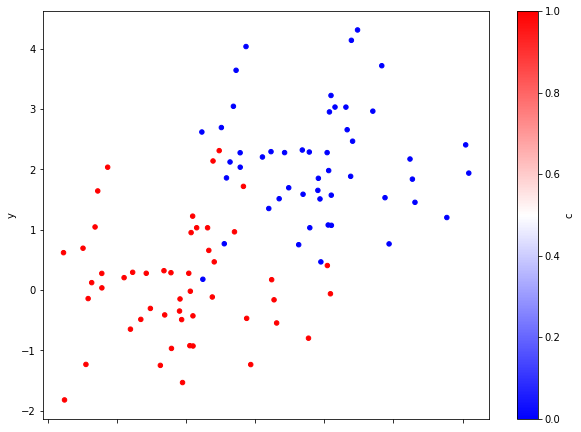

In [32]:
blobs_df = pd.concat([
    one_df.assign(c=1),
    (one_df + 2).assign(c=0),
])

blobs_df.plot.scatter(x="x", y="y", c="c",
                      cmap="bwr",
                      figsize=(10.0, 7.5))

In [33]:
svm = LinearSVC()
svm.fit(blobs_df.drop(columns="c"), blobs_df["c"])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [37]:
x_test = np.linspace(-2, 5, 1000)
y_test = np.linspace(-2, 5, 1000)
xx, yy = np.meshgrid(x_test, y_test)

In [38]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]) \
    .reshape(xx.shape)

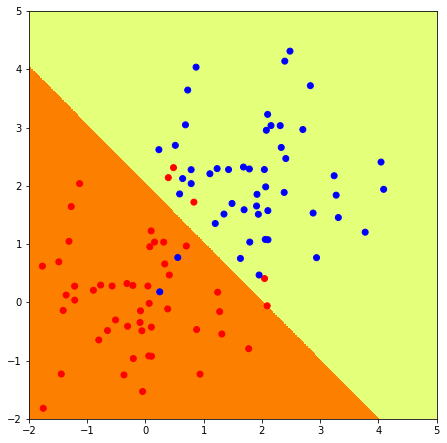

In [39]:
plt.figure(figsize=(10.5, 7.5))
plt.imshow(Z, interpolation="nearest",
           extent=(-2, 5, -2, 5),
           cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], 
            c=blobs_df["c"], cmap="bwr")

## Rozszerzenia SVM

Oryginalnie, algorytm SVM tworzy klasyfikator liniowy, jednak istnieją również rozszerzenia, które wykorzystują tzw. *kernel trick* i niejawnie przechodzą przy tym do innych przestrzeni, w których problem nieseparowalny liniowo, staje się już separowalny. 

In [40]:
from sklearn.svm import SVC

In [62]:
svm = SVC(kernel="poly")
svm.fit(blobs_df.drop(columns="c"), blobs_df["c"])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]) \
    .reshape(xx.shape)

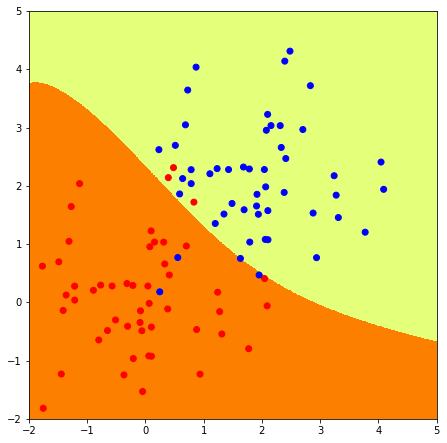

In [64]:
plt.figure(figsize=(10.5, 7.5))
plt.imshow(Z, interpolation="nearest",
           extent=(-2, 5, -2, 5),
           cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], 
            c=blobs_df["c"], cmap="bwr")